In [23]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from sklearn.mixture import GaussianMixture

In [4]:
n_samples = 300
# generate random sample, two components
np.random.seed(0)

In [16]:
# generate spherical data centered on (20, 20)
data1 = np.random.randn(n_samples, 2)
shifted_gaussian = data1 + np.array([20, 20])

In [19]:
# generate zero centered stretched Gaussian data
C = np.array([[0., -0.7], [3.5, .7]])
stretched_gaussian = np.dot(np.random.randn(n_samples, 2), C)

In [22]:
# concatenate the two datasets into the final training set
X_train = np.vstack([shifted_gaussian, stretched_gaussian])

In [52]:
# fit a Gaussian Mixture Model with two components
clf = GaussianMixture(n_components=2, covariance_type='full')
clf.fit(X_train)
X_train.shape

(600, 2)

In [60]:
# display predicted scores by the model as a contour plot
x = np.linspace(-20., 30.)
y = np.linspace(-20., 40.)
X, Y = np.meshgrid(x, y)
XX = np.array([X.ravel(), Y.ravel()]).T

In [66]:
Z = -clf.score_samples(XX)
Z = Z.reshape(X.shape)

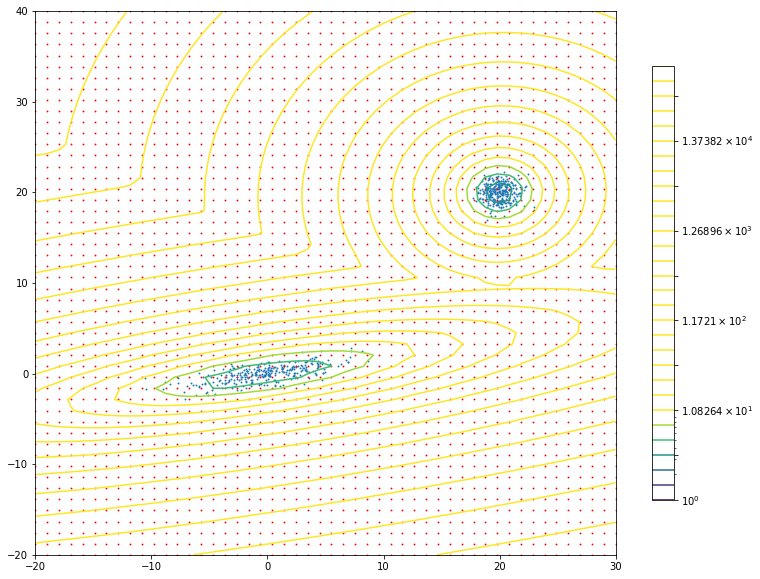

In [88]:
fig, ax = plt.subplots(figsize=(13, 10))
ax.scatter(X_train[:, 0], X_train[:, 1], .8)
ax.scatter(X.ravel(), Y.ravel(), .7, color='red')
CS = ax.contour(X, Y, Z, norm=LogNorm(vmin=1.0, vmax=10.0), levels=np.logspace(0, 5, 30))
fig.colorbar(CS, shrink=0.8, extend='both')
plt.show()